### Introduction

Before jumping into machine learning, let's try to solve a problem manually.

You have started working as a researcher in a botanical garden and you noticed that botanists have been struggling to tell the difference between two types of Iris Setosa and Iris Versicolor plants because they look very similar.

Luckily a friend of yours has taken some measurements of both types of plants.

### Exploration of the problem

Let's print out your friend's dataset:

In [1]:
# Use pandas (https://pandas.pydata.org/) a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
# We only use very basic pandas functionality in this course so you don't need to worry too much about what it is doing.
# At the end of this course, we provide a list of resources for learning some of the third party tools used in this course.

import pandas as pd

# load the dataset
iris = pd.read_csv("data/iris_subset.csv")

# print out the dataset
iris

,Petal_Length,Petal_Width,Class
0,1.4,0.2,Iris-setosa
1,1.5,0.2,Iris-setosa
2,1.5,0.2,Iris-setosa
3,1.6,0.2,Iris-setosa
4,1.5,0.4,Iris-setosa
5,1.5,0.3,Iris-setosa
6,1.7,0.5,Iris-setosa
7,1.5,0.2,Iris-setosa
8,1.5,0.4,Iris-setosa
9,1.2,0.2,Iris-setosa


Your goal was to come up with an API that allows users to enter the petal length and petal width and it will predict the Class of Iris.

Let's plot the dataset from your friend to look for any interesting patterns.

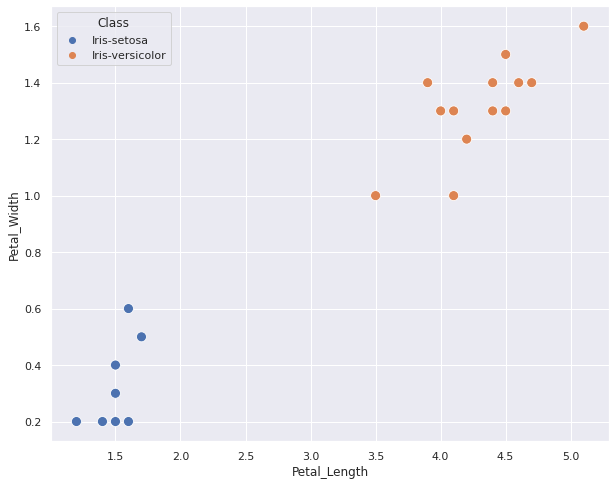

In [2]:
# use seaborn (https://seaborn.pydata.org/) a library for drawing attractive and informative statistical graphics
# We only use very basic seaborn functionality in this course so you don't need to worry too much about what it is doing.
# At the end of this course, we provide a list of resources for learning some of the third party tools used in this course.

import seaborn as sns

# increase the plot size
sns.set( rc={'figure.figsize':(10, 8)} )

# use the seaborn scatterplot function to print out the data set
plot = sns.scatterplot (
        x = iris['Petal_Length'], 
        y = iris['Petal_Width'], 
        hue = iris['Class'], 
        s=100
    )

### Build a prediction engine

We are really excited by our analysis and think we can easily build an Iris predictor.

One way to decide the class of Iris flower is to draw a verical line separating the data points.

**Exercise 01:** where would you draw a line?

In [3]:
YOUR_PETAL_LENGTH_DECIDER = 0.0 ### enter a non-zero float value ####

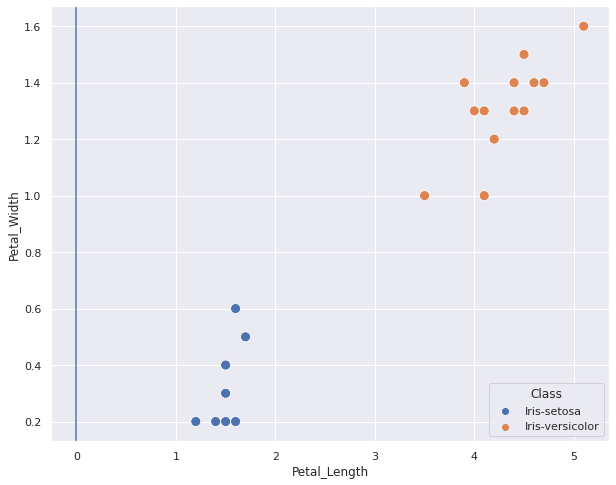

In [4]:
# plot the data again
plot = sns.scatterplot(x=iris['Petal_Length'], y=iris['Petal_Width'], hue=iris['Class'], s=100)

# now add a verical line to the plot
plot.axvline(YOUR_PETAL_LENGTH_DECIDER)

We can now implement a simple function that uses YOUR_PETAL_LENGTH_DECIDER to determine the class of Iris

In [5]:
def iris_predictor( petal_length ):
    if petal_length < YOUR_PETAL_LENGTH_DECIDER:
        return "Iris-setosa"
    else:
        return "Iris-versicolor"

### Test your prediction engine

**Exercise 02:** Test your predictor

Try some different values of petal length and observe the prediction

In [6]:
iris_predictor( petal_length=1.5 ) 

'Iris-versicolor'

In [7]:
iris_predictor( petal_length=3.5 )

'Iris-versicolor'

While this test is useful to ensure we haven't made any big mistakes in our logic, we should verify the predictor with new data.

While you have been busy building our prediction engine, your friend has been collecting more data

In [8]:
# read the test dataset
test_data = pd.read_csv("data/iris_test.csv")

# print the first few records
test_data.head()

,Petal_Length,Petal_Width,Class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.4,0.2,Iris-setosa
3,1.4,0.1,Iris-setosa
4,1.3,0.4,Iris-setosa


In [9]:
# create a new column 'predicted_class' by applying our iris_predictor function to each value of Petal_Length
predicted_class = test_data['Petal_Length'].apply( lambda x: iris_predictor(x) )

# view the new column
predicted_class

0     Iris-versicolor
1     Iris-versicolor
2     Iris-versicolor
3     Iris-versicolor
4     Iris-versicolor
5     Iris-versicolor
6     Iris-versicolor
7     Iris-versicolor
8     Iris-versicolor
9     Iris-versicolor
10    Iris-versicolor
11    Iris-versicolor
12    Iris-versicolor
13    Iris-versicolor
14    Iris-versicolor
15    Iris-versicolor
16    Iris-versicolor
17    Iris-versicolor
18    Iris-versicolor
19    Iris-versicolor
20    Iris-versicolor
21    Iris-versicolor
22    Iris-versicolor
23    Iris-versicolor
24    Iris-versicolor
Name: Petal_Length, dtype: object

In [10]:
# compare the predicted column to our new column
predicted_class == test_data['Class']

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
dtype: bool

Our engine was able to correctly predict all of the new data!!!

Let's call it a day with this fantasic win in the bag :)

### Summary

In this notebook, you manually created an algorithm (without machine learning) that was able to predict Iris flower classes based on the petal length.

**Questions:**

- What happens when we have more data?  I.e. how do we re-train the predictor?
- How would we build a predictor that has more features (e.g. Sepal Length and Sepal Width)?
- What type of prediction did we do? (regression, classification, clustering)
- What approach did we use? (supervised, semi-supervised, unsupervised and reinforcement)

### Navigation

[Previous](./00-README-FIRST.ipynb) | [Next](./02_manual_method_issues.ipynb) notebook.